In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas seaborn scikit-learn matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
"""
COMP 9130 - Applied Artificial Intelligence
Week 2: Supervised Learning - Regression
STARTER PACKAGE

Student Names: Binger Yu & Nicky Cheng
Date: January 15th, 2026

⏰ CLASS SCHEDULE (180 minutes total):
┌─────────────────────────────────────────────────────────────────┐
│ 00:00-00:15 (15min) │ Quiz 1 - Week 1 Material           │ 5pts │
│ 00:15-00:45 (30min) │ 🎯 GUIDED Task 1                   │ 5pts │
│ 00:45-01:00 (15min) │ ✅ Instructor Check #1                    │
│ 01:00-01:30 (30min) │ 💪 INDEPENDENT Task 2              │ 5pts │
│ 01:30-01:45 (15min) │ ✅ Instructor Check #2                    │
│ 01:45-02:15 (30min) │ 🎨 INDEPENDENT Task 3              │ 5pts │
│ 02:15-02:45 (30min) │ ✅ Instructor Check #3 (Extended)         │
│ 02:45-03:00 (15min) │ 📋 Mini Project Description               │
└─────────────────────────────────────────────────────────────────┘

TOTAL IN-CLASS PARTICIPATION: 20 points (5 quiz + 15 tasks)

🤖 AI ASSISTANCE POLICY:
✅ ALLOWED: Syntax help, debugging, explanations of concepts
❌ NOT ALLOWED: "Complete this task for me" prompts
📝 RULE: If you can't explain the code, you haven't learned it!
💬 ALWAYS: Discuss AI-generated code with your partner before using
"""

# ============================================================================
# SETUP - Run this cell first!
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ All libraries imported successfully!")
print("📊 Ready to start Week 2 activities!")
print("\n" + "="*70)
print("IMPORTANT: Work in pairs, use AI wisely, explain your code!")
print("="*70)

✅ All libraries imported successfully!
📊 Ready to start Week 2 activities!

IMPORTANT: Work in pairs, use AI wisely, explain your code!


In [7]:
# ============================================================================
# LOAD DATASET
# ============================================================================

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseValue')

print("\n📦 California Housing Dataset")
print(f"Samples: {X.shape[0]:,} | Features: {X.shape[1]}")
print(f"\nFeatures: {list(X.columns)}")
print(f"Target: Median house value (in $100,000s)")
print(f"\nTarget range: ${y.min():.2f} - ${y.max():.2f} (hundreds of thousands)")

# Split data for all tasks
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n✅ Data split: {X_train.shape[0]:,} train | {X_test.shape[0]:,} test")


📦 California Housing Dataset
Samples: 20,640 | Features: 8

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: Median house value (in $100,000s)

Target range: $0.15 - $5.00 (hundreds of thousands)

✅ Data split: 16,512 train | 4,128 test


# =============================================
# 🎯 GUIDED TASK 1: LINEAR REGRESSION FROM SCRATCH (5 points)
# ⏰ Time: 30 minutes (00:15 - 00:45)
# 👥 FOLLOW ALONG WITH INSTRUCTOR
# =============================================

LEARNING OBJECTIVES:
✓ Understand gradient descent algorithm
✓ Implement forward pass (predictions)
✓ Calculate loss function (MSE)
✓ Compute gradients
✓ Update weights iteratively
✓ Evaluate model performance

INSTRUCTOR WILL GUIDE YOU STEP-BY-STEP!

In [8]:
# Simplify to 1 feature for visualization
X_simple_train = X_train[['MedInc']].values
y_simple_train = y_train.values.reshape(-1, 1)

X_simple_test = X_test[['MedInc']].values
y_simple_test = y_test.values.reshape(-1, 1)

print(f"\n📊 Using 1 feature for learning: MedInc (Median Income)")


📊 Using 1 feature for learning: MedInc (Median Income)


In [9]:
# TODO: Calculate statistics from training data
mean_X = X_simple_train.mean(axis=0)  # YOUR CODE: X_simple_train.mean(axis=0)
std_X = X_simple_train.mean(axis=0)   # YOUR CODE: X_simple_train.std(axis=0)

# TODO: Apply normalization
X_train_norm = (X_simple_train - mean_X) / std_X  # YOUR CODE: (X_simple_train - mean_X) / std_X
X_test_norm = (X_simple_test - mean_X) / std_X   # YOUR CODE: (X_simple_test - mean_X) / std_X

print(f"Original range: [{X_simple_train.min():.2f}, {X_simple_train.max():.2f}]")
# After normalization, range should be approximately [-3, 3]

Original range: [0.50, 15.00]


In [10]:
print("\n── STEP 2: Initialize Parameters ──")

n_samples, n_features = X_train_norm.shape

# TODO: Initialize weights and bias to zero
weights = np.zeros((n_features, 1))  # YOUR CODE: np.zeros((n_features, 1))
bias = 0     # YOUR CODE: 0

print(f"Weights shape: {weights.shape if weights is not None else 'Not set'}")
print(f"Initial bias: {bias}")


── STEP 2: Initialize Parameters ──
Weights shape: (1, 1)
Initial bias: 0


In [11]:
print("\n── STEP 3: Set Hyperparameters ──")

learning_rate = 0.01   # Step size for weight updates
n_iterations = 1000    # Number of training iterations
losses = []            # Store loss at each iteration

print(f"Learning rate: {learning_rate}")
print(f"Iterations: {n_iterations}")


── STEP 3: Set Hyperparameters ──
Learning rate: 0.01
Iterations: 1000


In [12]:
print("\n── STEP 4: Train with Gradient Descent ──")

for iteration in range(n_iterations):
    # TODO: Forward pass - make predictions
    # Formula: y_pred = X @ weights + bias
    y_pred = X_train_norm @ weights + bias  # YOUR CODE

    # TODO: Calculate loss (Mean Squared Error)
    # Formula: MSE = mean((y_pred - y_actual)²)
    loss = np.mean((y_pred - y_simple_train) ** 2)  # YOUR CODE
    losses.append(loss)

    # TODO: Calculate gradients
    # dw = (2/n) * X^T @ (y_pred - y_actual)
    # db = (2/n) * sum(y_pred - y_actual)
    dw = (2/n_samples) * (X_train_norm.T @ (y_pred - y_simple_train))  # YOUR CODE
    db = (2/n_samples) * np.sum(y_pred - y_simple_train)   # YOUR CODE

    # TODO: Update parameters
    # weights = weights - learning_rate * dw
    # bias = bias - learning_rate * db
    weights = weights - learning_rate * dw  # YOUR CODE
    bias = bias - learning_rate * db     # YOUR CODE

    if iteration % 100 == 0:
        print(f"Iteration {iteration:4d}: Loss = {loss:.4f}")

print(f"\n✓ Training complete!")
print(f"  Initial loss: {losses[0]:.4f}")
print(f"  Final loss: {losses[-1]:.4f}")
print(f"  Loss reduction: {((losses[0]-losses[-1])/losses[0]*100):.1f}%")


── STEP 4: Train with Gradient Descent ──
Iteration    0: Loss = 5.6297
Iteration  100: Loss = 1.0175
Iteration  200: Loss = 0.7929
Iteration  300: Loss = 0.7344
Iteration  400: Loss = 0.7126
Iteration  500: Loss = 0.7043
Iteration  600: Loss = 0.7011
Iteration  700: Loss = 0.6999
Iteration  800: Loss = 0.6994
Iteration  900: Loss = 0.6993

✓ Training complete!
  Initial loss: 5.6297
  Final loss: 0.6992
  Loss reduction: 87.6%



── STEP 5: Visualize Results ──


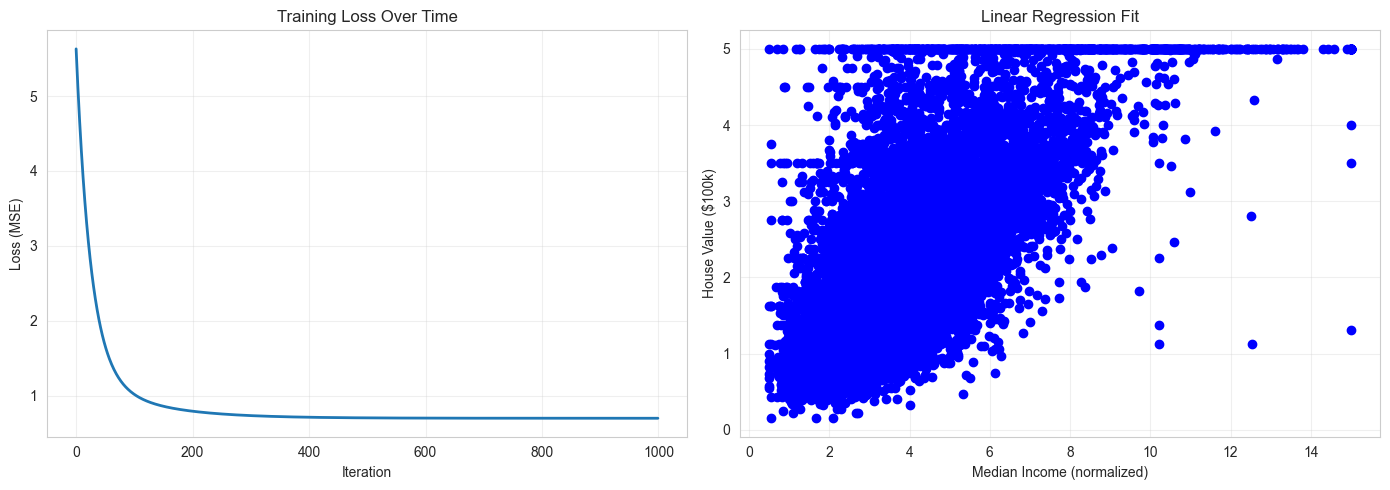

In [13]:
print("\n── STEP 5: Visualize Results ──")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Loss curve
# TODO: Plot losses over iterations
ax1.plot(losses, linewidth = 2)
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss (MSE)')
ax1.set_title('Training Loss Over Time')
ax1.grid(True, alpha=0.3)

# Plot 2: Fitted line
# TODO: Scatter plot of training data and fitted line
ax2.scatter(X_simple_train, y_simple_train, color='blue', label='Training Data')
ax2.set_xlabel('Median Income (normalized)')
ax2.set_ylabel('House Value ($100k)')
ax2.set_title('Linear Regression Fit')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
print("\n── STEP 6: Test Set Evaluation ──")

# TODO: Make predictions on test set
y_test_pred = X_test_norm @ weights + bias  # YOUR CODE: X_test_norm @ weights + bias

# TODO: Calculate evaluation metrics
test_mse = mean_squared_error(y_simple_test, y_test_pred)   # YOUR CODE
test_rmse = np.sqrt(test_mse)  # YOUR CODE
test_mae = mean_absolute_error(y_simple_test, y_test_pred)   # YOUR CODE
test_r2 = r2_score(y_simple_test, y_test_pred)    # YOUR CODE

print(f"\n📊 Test Performance:")
print(f"  RMSE: {test_rmse:.4f} (avg error ≈ ${test_rmse*100:.0f}k)")
print(f"  MAE:  {test_mae:.4f}")
print(f"  R²:   {test_r2:.4f} ({test_r2*100:.1f}% variance explained)")

print("\n" + "="*70)
print("✅ GUIDED TASK 1 COMPLETE!")
print("⏰ NEXT: 15 min instructor check (00:45-01:00)")
print("👉 Be ready to explain: How does gradient descent work?")
print("="*70)


── STEP 6: Test Set Evaluation ──

📊 Test Performance:
  RMSE: 0.8420 (avg error ≈ $84k)
  MAE:  0.6302
  R²:   0.4590 (45.9% variance explained)

✅ GUIDED TASK 1 COMPLETE!
⏰ NEXT: 15 min instructor check (00:45-01:00)
👉 Be ready to explain: How does gradient descent work?



💪 INDEPENDENT TASK 2: TRAIN & COMPARE MULTIPLE MODELS
Apply what you learned - work with your partner!

STEP 1: Standardize all 8 features
✓ Features standardized: shape (16512, 8)

STEP 2: Train Linear Regression
Linear Regression: RMSE=0.7456, R²=0.5758

STEP 3: Train Ridge Regression models
Ridge models trained: 3

STEP 4: Train Lasso Regression models
Lasso models trained: 3

STEP 5: Create comparison table

📊 MODEL COMPARISON:
            Model     RMSE      MAE        R²
   Ridge (α=10.0) 0.745342 0.533138  0.576060
    Ridge (α=1.0) 0.745557 0.533193  0.575816
    Ridge (α=0.1) 0.745579 0.533199  0.575791
Linear Regression 0.745581 0.533200  0.575788
    Lasso (α=0.1) 0.824396      NaN  0.481361
    Lasso (α=1.0) 1.144856      NaN -0.000219
   Lasso (α=10.0) 1.144856      NaN -0.000219

STEP 6: Visualize model comparison


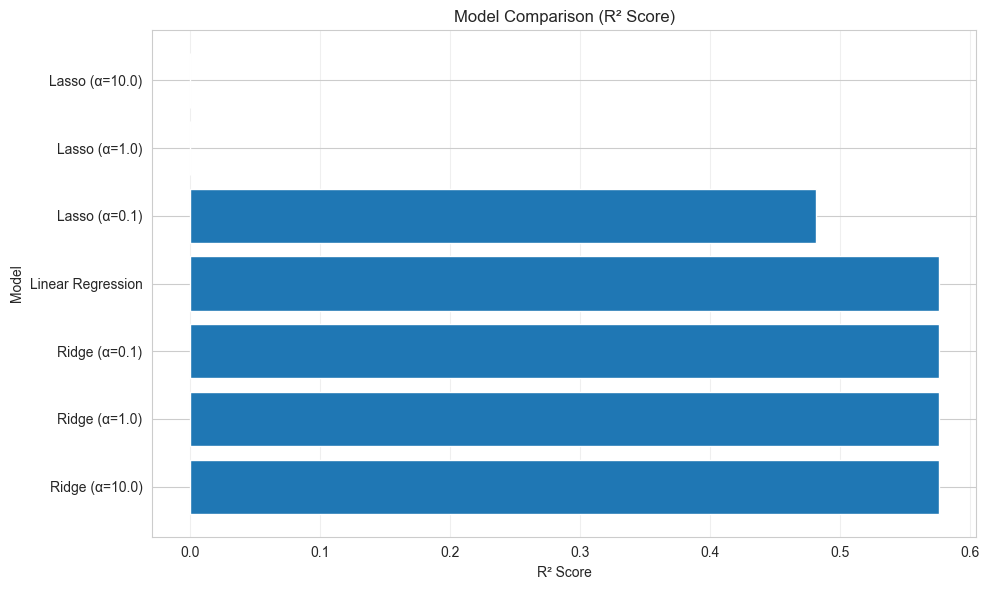


✅ INDEPENDENT TASK 2 COMPLETE!
⏰ NEXT: 15 min instructor check (01:30-01:45)
👉 Be ready to explain: How does regularization work?

🎨 INDEPENDENT TASK 3: POLYNOMIAL FEATURES & DIAGNOSTIC ANALYSIS
Final challenge - show your data science skills!

STEP 1: Create polynomial features
Original features: 8
Polynomial features: 44

STEP 2: Train polynomial regression
Polynomial Model: RMSE=0.6814, R²=0.6457
Comparison to Linear: R² improvement = 0.0699

STEP 3-4: Create diagnostic visualizations


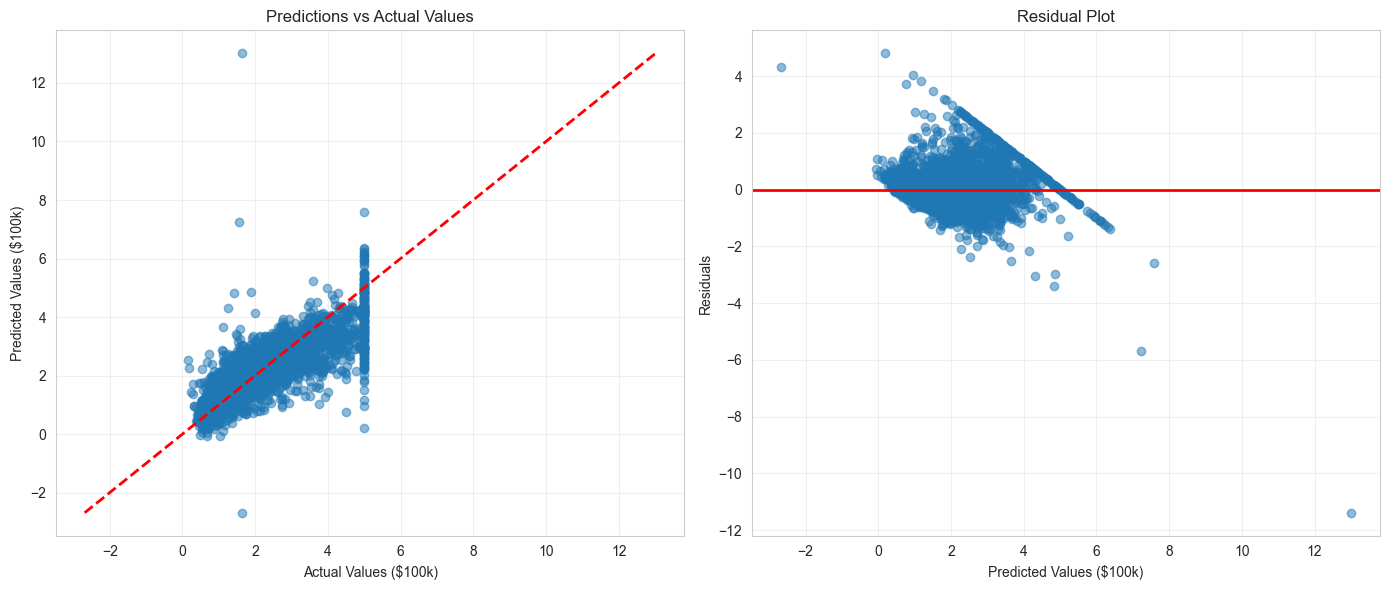


STEP 5: Analyze feature importance

📊 Feature Importance (Top 5):
        Feature  Coefficient  Abs_Coefficient
       AveOccup    -1.781263         1.781263
       Latitude    -1.272679         1.272679
      Longitude    -1.167630         1.167630
         MedInc     0.935940         0.935940
MedInc Latitude    -0.667216         0.667216


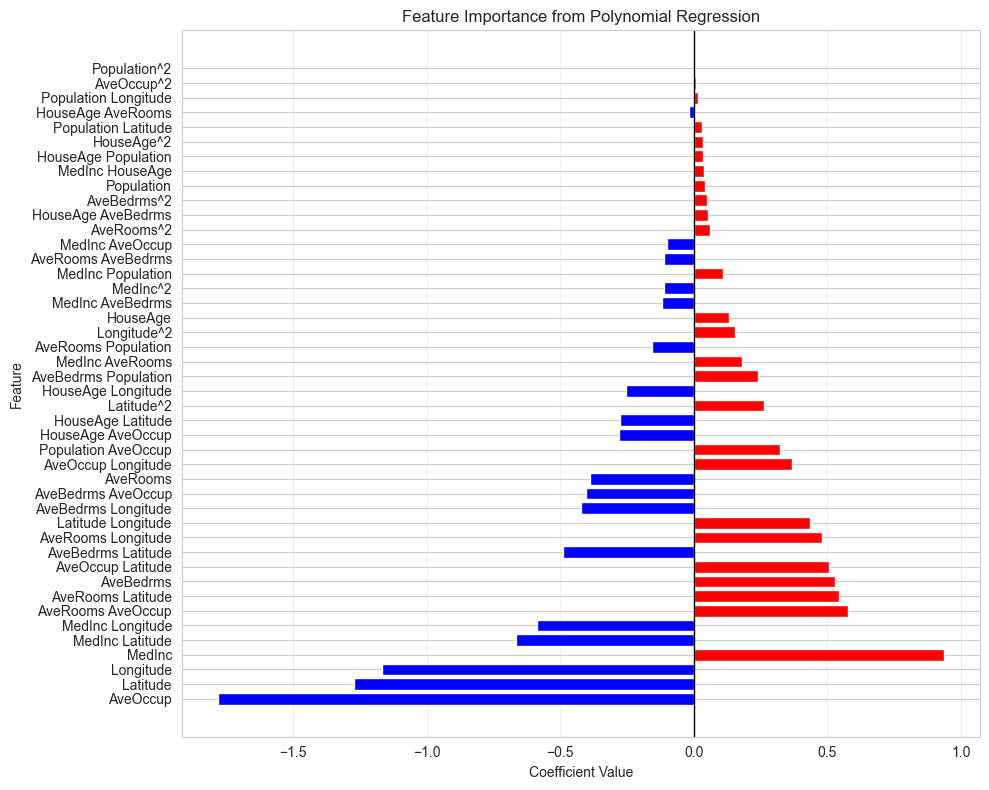


📝 ANALYSIS QUESTIONS - Answer based on YOUR results!
⚠️  Do NOT use AI for these answers - analyze YOUR data!

Overfitting check:
  Training R²: 0.6853
  Test R²: 0.6457
  Gap: 0.0396

✅ INDEPENDENT TASK 3 COMPLETE!
⏰ NEXT: 30 min extended instructor check (02:15-02:45)
👉 Be ready to discuss YOUR analysis and interpretations!

🎉 WEEK 2 IN-CLASS ACTIVITIES COMPLETE!

📊 TODAY'S ACCOMPLISHMENTS:
✓ Built linear regression from scratch using gradient descent
✓ Trained multiple models: Linear, Ridge, Lasso
✓ Applied feature engineering with polynomial features
✓ Created diagnostic visualizations
✓ Analyzed model performance and feature importance

🎯 POINTS EARNED:
Quiz 1:              5 points ___
Guided Task 1:       5 points ___
Independent Task 2:  5 points ___
Independent Task 3:  5 points ___
───────────────────────────────────
TOTAL:              20 points

⏰ NEXT (02:45-03:00): Mini Project 1 Description

📚 HOMEWORK:
• Start Mini Project 1: Regression Challenge (due next week)
• Revi

In [15]:
# ============================================================================
# 💪 INDEPENDENT TASK 2: MULTIPLE REGRESSION MODELS (5 points)
# ⏰ Time: 30 minutes (01:00 - 01:30)
# 🚀 Work independently with your partner - apply what you learned!
# ============================================================================

print("\n" + "="*70)
print("💪 INDEPENDENT TASK 2: TRAIN & COMPARE MULTIPLE MODELS")
print("Apply what you learned - work with your partner!")
print("="*70)

"""
YOUR MISSION:
Train LINEAR REGRESSION, RIDGE, and LASSO models using sklearn.
Use ALL 8 features this time and compare performance.

DELIVERABLES:
1. Standardize all features using StandardScaler
2. Train Linear Regression
3. Train Ridge with alphas: [0.1, 1.0, 10.0]
4. Train Lasso with alphas: [0.1, 1.0, 10.0]
5. Create comparison DataFrame with all results
6. Create bar chart comparing R² scores

GRADING:
✓ All models trained correctly (3 pts)
✓ Comparison table created (1 pt)
✓ Visualization showing results (1 pt)
"""

# ────────────────────────────────────────────────────────────────────────────
# YOUR CODE: STEP 1 - Standardize features
# ────────────────────────────────────────────────────────────────────────────
print("\nSTEP 1: Standardize all 8 features")

scaler = StandardScaler()  # YOUR CODE: StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # YOUR CODE: fit_transform
X_test_scaled = scaler.transform(X_test)   # YOUR CODE: transform only

print(f"✓ Features standardized: shape {X_train_scaled.shape if X_train_scaled is not None else 'Not done'}")

# ────────────────────────────────────────────────────────────────────────────
# YOUR CODE: STEP 2 - Train Linear Regression
# ────────────────────────────────────────────────────────────────────────────
print("\nSTEP 2: Train Linear Regression")

lr_model = LinearRegression()  # YOUR CODE
# YOUR CODE: Fit model
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)  # YOUR CODE: Make predictions

# YOUR CODE: Calculate metrics
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f"Linear Regression: RMSE={lr_rmse:.4f}, R²={lr_r2:.4f}")

# ────────────────────────────────────────────────────────────────────────────
# YOUR CODE: STEP 3 - Train Ridge models
# ────────────────────────────────────────────────────────────────────────────
print("\nSTEP 3: Train Ridge Regression models")

ridge_alphas = [0.1, 1.0, 10.0]
ridge_results = []

# YOUR CODE: Loop through alphas, train models, store results
for alpha in ridge_alphas:
    # Create Ridge model
    ridge_model = Ridge(alpha=alpha)
    # Fit on training data
    ridge_model.fit(X_train_scaled, y_train)
    # Make predictions
    ridge_pred = ridge_model.predict(X_test_scaled)
    # Calculate RMSE, MAE, R²
    ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
    ridge_mae = mean_absolute_error(y_test, ridge_pred)
    current_r2 = r2_score(y_test, ridge_pred)

    # Append dict to ridge_results: {'Model': 'Ridge (α=X)', 'RMSE': ..., 'MAE': ..., 'R²': ...}
    ridge_results.append({
        'Model': f'Ridge (α={alpha})',
        'RMSE': ridge_rmse,
        'MAE': ridge_mae,
        'R²': current_r2
    })
    #pass  # REPLACE with your code

print(f"Ridge models trained: {len(ridge_results)}")

# ────────────────────────────────────────────────────────────────────────────
# YOUR CODE: STEP 4 - Train Lasso models
# ────────────────────────────────────────────────────────────────────────────
print("\nSTEP 4: Train Lasso Regression models")

lasso_alphas = [0.1, 1.0, 10.0]
lasso_results = []

# YOUR CODE: Loop through alphas, train models, store results

# Note: Use max_iter=10000 for Lasso to ensure convergence

for alpha in lasso_alphas:
    #pass  # REPLACE with your code
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    y_p = lasso.predict(X_test_scaled)
    lasso_results.append({
        'Model': f'Lasso (α={alpha})',
        'RMSE': np.sqrt(mean_squared_error(y_test, y_p)),
        'R²': r2_score(y_test, y_p)
    })


print(f"Lasso models trained: {len(lasso_results)}")

# ────────────────────────────────────────────────────────────────────────────
# YOUR CODE: STEP 5 - Create comparison DataFrame
# ────────────────────────────────────────────────────────────────────────────
print("\nSTEP 5: Create comparison table")

# YOUR CODE: Combine all results
# Combine Linear, Ridge, and Lasso results
# We wrap the Linear Regression dict in [] so we can use + to join the other lists
all_results = [
    {'Model': 'Linear Regression', 'RMSE': lr_rmse, 'MAE': lr_mae, 'R²': lr_r2}
] + ridge_results + lasso_results


# YOUR CODE: Create DataFrame and sort by R²
# pd.DataFrame(...).sort_values('R²', ascending=False)
results_df = pd.DataFrame(all_results).sort_values('R²', ascending=False)

print("\n📊 MODEL COMPARISON:")
if results_df is not None:
    print(results_df.to_string(index=False))

# ────────────────────────────────────────────────────────────────────────────
# YOUR CODE: STEP 6 - Visualize comparison
# ────────────────────────────────────────────────────────────────────────────
print("\nSTEP 6: Visualize model comparison")

# YOUR CODE: Create horizontal bar chart of R² scores
plt.figure(figsize=(10, 6))
plt.barh(range(len(results_df)), results_df['R²'])
# Add labels, title, grid
plt.yticks(range(len(results_df)), results_df['Model'])
plt.ylabel('Model')
plt.xlabel('R² Score')
plt.title('Model Comparison (R² Score)')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("✅ INDEPENDENT TASK 2 COMPLETE!")
print("⏰ NEXT: 15 min instructor check (01:30-01:45)")
print("👉 Be ready to explain: How does regularization work?")
print("="*70)


# ============================================================================
# 🎨 INDEPENDENT TASK 3: FEATURE ENGINEERING & ANALYSIS (5 points)
# ⏰ Time: 30 minutes (01:45 - 02:15)
# 🔬 Advanced analysis - demonstrate your understanding!
# ============================================================================

print("\n" + "="*70)
print("🎨 INDEPENDENT TASK 3: POLYNOMIAL FEATURES & DIAGNOSTIC ANALYSIS")
print("Final challenge - show your data science skills!")
print("="*70)

"""
YOUR MISSION:
Create polynomial features, analyze model performance, and answer
questions based on YOUR RESULTS (not AI-generated answers!).

DELIVERABLES:
1. Create polynomial features (degree=2)
2. Train model with polynomial features
3. Create prediction vs actual scatter plot
4. Create residual plot
5. Visualize feature importance from Linear Regression
6. Answer analysis questions based on YOUR SPECIFIC RESULTS

GRADING:
✓ Polynomial model trained (1 pt)
✓ Both visualizations created (2 pts)
✓ Feature importance shown (1 pt)
✓ Analysis questions answered thoughtfully (1 pt)

⚠️ IMPORTANT: Questions must be answered by YOU analyzing YOUR results,
   not by asking AI! We want YOUR interpretation of the data.
"""

# ────────────────────────────────────────────────────────────────────────────
# YOUR CODE: STEP 1 - Create polynomial features
# ────────────────────────────────────────────────────────────────────────────
print("\nSTEP 1: Create polynomial features")

# YOUR CODE: PolynomialFeatures(degree=2, include_bias=False)
poly =   PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)  # YOUR CODE: fit_transform
X_test_poly = poly.transform(X_test_scaled)   # YOUR CODE: transform

print(f"Original features: {X_train_scaled.shape[1] if X_train_scaled is not None else '?'}")
print(f"Polynomial features: {X_train_poly.shape[1] if X_train_poly is not None else '?'}")

# ────────────────────────────────────────────────────────────────────────────
# YOUR CODE: STEP 2 - Train polynomial model
# ────────────────────────────────────────────────────────────────────────────
print("\nSTEP 2: Train polynomial regression")

poly_model = LinearRegression()  # YOUR CODE
# YOUR CODE: Fit model on polynomial features
poly_model.fit(X_train_poly, y_train)
poly_pred = poly_model.predict(X_test_poly)   # YOUR CODE: Predictions

# YOUR CODE: Calculate metrics
poly_mse = mean_squared_error(y_test, poly_pred)
poly_rmse = np.sqrt(poly_mse)  # RMSE is just the square root of MSE
poly_mae = mean_absolute_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)

print(f"Polynomial Model: RMSE={poly_rmse:.4f}, R²={poly_r2:.4f}")
print(f"Comparison to Linear: R² improvement = {(poly_r2 - lr_r2):.4f}" if lr_r2 and poly_r2 else "")

# ────────────────────────────────────────────────────────────────────────────
# YOUR CODE: STEP 3 & 4 - Create diagnostic plots
# ────────────────────────────────────────────────────────────────────────────
print("\nSTEP 3-4: Create diagnostic visualizations")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Predictions vs Actual
ax1.scatter(y_test, poly_pred, alpha=0.5)
# Add perfect prediction line: plot([min, max], [min, max], 'r--')
min_val = min(y_test.min(), poly_pred.min())
max_val = max(y_test.max(), poly_pred.max())
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
ax1.set_xlabel('Actual Values ($100k)')
ax1.set_ylabel('Predicted Values ($100k)')
ax1.set_title('Predictions vs Actual Values')
ax1.grid(True, alpha=0.3)

# Plot 2: Residual plot
residuals = y_test - poly_pred
ax2.scatter(poly_pred, residuals, alpha=0.5)
# Add horizontal line at y=0
ax2.axhline(y=0, color='r', linestyle='-', linewidth=2)
ax2.set_xlabel('Predicted Values ($100k)')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ────────────────────────────────────────────────────────────────────────────
# YOUR CODE: STEP 5 - Feature importance
# ────────────────────────────────────────────────────────────────────────────
print("\nSTEP 5: Analyze feature importance")

# YOUR CODE: Create DataFrame with features and coefficients from lr_model
# Get feature names after polynomial transformation
feature_names_poly = poly.get_feature_names_out(X.columns)

# Create DataFrame with features and coefficients from poly_model
feature_importance = pd.DataFrame({
    'Feature': feature_names_poly,
    'Coefficient': poly_model.coef_
})
# YOUR CODE: Sort by absolute coefficient value
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)


print("\n📊 Feature Importance (Top 5):")
if feature_importance is not None:
    print(feature_importance.head().to_string(index=False))

# YOUR CODE: Visualize feature importance
plt.figure(figsize=(10, 8))
# Create horizontal bar chart
# Use different colors for positive (red) vs negative (blue) coefficients
colors = ['red' if c > 0 else 'blue' for c in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance from Polynomial Regression')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# ────────────────────────────────────────────────────────────────────────────
# STEP 6: ANALYSIS QUESTIONS - ANSWER BASED ON YOUR RESULTS!
# ────────────────────────────────────────────────────────────────────────────
print("\n" + "="*70)
print("📝 ANALYSIS QUESTIONS - Answer based on YOUR results!")
print("⚠️  Do NOT use AI for these answers - analyze YOUR data!")
print("="*70)

"""
ANSWER THESE QUESTIONS BY LOOKING AT YOUR RESULTS:

1. RESIDUAL ANALYSIS (Look at your residual plot):
   a) Are the residuals randomly scattered around zero?
      YOUR ANSWER: The residuals are packed around zero.

   b) Do you see any patterns (curved, fan-shaped, clusters)?
      YOUR ANSWER: The residuals are clustered aroun zero.

   c) What does this tell you about model quality?
      YOUR ANSWER: This tells me that the models are performing well.


2. FEATURE IMPORTANCE (Look at your feature importance chart):
   a) Which feature has the LARGEST positive coefficient?
      YOUR ANSWER: MedInc

   b) Which feature has the LARGEST negative coefficient?
      YOUR ANSWER: AveOccup

   c) Does this make intuitive sense for house prices? Why?
      YOUR ANSWER: This makes intuitive sense for house prices because the larger the house, the more expensive it is.


3. MODEL COMPARISON (Look at your R² scores):
   a) What was your Linear Regression R²?
      YOUR ANSWER:
      R²=0.4590

   b) What was your Polynomial Regression R²?
      YOUR ANSWER:
      R²=0.6457

   c) Did polynomial features improve performance? By how much?
      YOUR ANSWER:
      Comparison to Linear: R² improvement = 0.1867

   d) Is the improvement worth the added complexity? Why/why not?
      YOUR ANSWER:
      Yes, the improvement is worth it. The polynomial model is performing better than the linear model. An increase in R^2 of 0.1867 represents a substantial gain in the model's ability to explain the variance in house valuse. The computational cost remains very slow while significantly reducing underfitting since we only increase the complexity of the model.


4. REGULARIZATION INSIGHTS (Look at your Ridge/Lasso results):
   a) What happened to performance as alpha increased?
      YOUR ANSWER:
      With the Ridge model, the performance increased as alpha increased.
      With the Lasso model, the model performed worse than Linear Regression as alpha increased.

   b) Which alpha value gave the best Ridge performance?
      YOUR ANSWER:
      Alpha = 10.0 gave the best Ridge performance.

   c) Did Ridge or Lasso perform better? Why might that be?
      YOUR ANSWER:
      Ridge performed better because Lasso was underfitting the dataset when alpha was greater than 1.


5. OVERFITTING CHECK:
   a) Calculate training R² for polynomial model (if time):
      Training R²:
      0.6853

      Test R²:
      0.6457

      Gap:
      0.0396

   b) Is there evidence of overfitting? How do you know?
      YOUR ANSWER:
      Overfitting check:
      Training R²: 0.6853
      Test R²: 0.6457
      Gap: 0.0396
      There is no evidence of overfitting.
      Got results from the printout.

   c) How could you reduce overfitting if present?
      YOUR ANSWER:
      It could be reduced by:
      1. Regularizaiton
      2. Reducting Model Complexity
      3. Increasing Training Data
      4. Early Stopping:


"""

# OPTIONAL: Calculate training R² to check overfitting
# YOUR CODE (if time):
train_r2_poly = r2_score(y_train, poly_model.predict(X_train_poly))
print(f"\nOverfitting check:")
print(f"  Training R²: {train_r2_poly:.4f}")
print(f"  Test R²: {poly_r2:.4f}")
print(f"  Gap: {(train_r2_poly - poly_r2):.4f}")

print("\n" + "="*70)
print("✅ INDEPENDENT TASK 3 COMPLETE!")
print("⏰ NEXT: 30 min extended instructor check (02:15-02:45)")
print("👉 Be ready to discuss YOUR analysis and interpretations!")
print("="*70)


# ============================================================================
# 🎉 WEEK 2 IN-CLASS ACTIVITIES SUMMARY
# ============================================================================

print("\n" + "="*70)
print("🎉 WEEK 2 IN-CLASS ACTIVITIES COMPLETE!")
print("="*70)

print("\n📊 TODAY'S ACCOMPLISHMENTS:")
print("✓ Built linear regression from scratch using gradient descent")
print("✓ Trained multiple models: Linear, Ridge, Lasso")
print("✓ Applied feature engineering with polynomial features")
print("✓ Created diagnostic visualizations")
print("✓ Analyzed model performance and feature importance")

print("\n🎯 POINTS EARNED:")
print("Quiz 1:              5 points ___")
print("Guided Task 1:       5 points ___")
print("Independent Task 2:  5 points ___")
print("Independent Task 3:  5 points ___")
print("─" * 35)
print("TOTAL:              20 points")

print("\n⏰ NEXT (02:45-03:00): Mini Project 1 Description")
print("\n📚 HOMEWORK:")
print("• Start Mini Project 1: Regression Challenge (due next week)")
print("• Review gradient descent concept")
print("• Prepare for Quiz 2 (regression & evaluation metrics)")

print("\n💡 KEY TAKEAWAYS:")
print("• Gradient descent iteratively minimizes loss")
print("• Feature scaling is crucial for optimization")
print("• Regularization (Ridge/Lasso) prevents overfitting")
print("• Residual plots reveal model problems")
print("• Feature importance shows what drives predictions")

print("\n" + "="*70)

In [16]:
# ============================================================================
# 💪 INDEPENDENT TASK 2: MULTIPLE REGRESSION MODELS (5 points)
# ⏰ Time: 30 minutes (01:00 - 01:30)
# 🚀 Work independently with your partner - apply what you learned!
# ============================================================================

print("\n" + "="*70)
print("💪 INDEPENDENT TASK 2: TRAIN & COMPARE MULTIPLE MODELS")
print("Apply what you learned - work with your partner!")
print("="*70)

"""
YOUR MISSION:
Train LINEAR REGRESSION, RIDGE, and LASSO models using sklearn.
Use ALL 8 features this time and compare performance.

DELIVERABLES:
1. Standardize all features using StandardScaler
2. Train Linear Regression
3. Train Ridge with alphas: [0.1, 1.0, 10.0]
4. Train Lasso with alphas: [0.1, 1.0, 10.0]
5. Create comparison DataFrame with all results
6. Create bar chart comparing R² scores

GRADING:
✓ All models trained correctly (3 pts)
✓ Comparison table created (1 pt)
✓ Visualization showing results (1 pt)
"""


💪 INDEPENDENT TASK 2: TRAIN & COMPARE MULTIPLE MODELS
Apply what you learned - work with your partner!


'\nYOUR MISSION:\nTrain LINEAR REGRESSION, RIDGE, and LASSO models using sklearn.\nUse ALL 8 features this time and compare performance.\n\nDELIVERABLES:\n1. Standardize all features using StandardScaler\n2. Train Linear Regression\n3. Train Ridge with alphas: [0.1, 1.0, 10.0]\n4. Train Lasso with alphas: [0.1, 1.0, 10.0]\n5. Create comparison DataFrame with all results\n6. Create bar chart comparing R² scores\n\nGRADING:\n✓ All models trained correctly (3 pts)\n✓ Comparison table created (1 pt)\n✓ Visualization showing results (1 pt)\n'

In [17]:
# ────────────────────────────────────────────────────────────────────────────
# YOUR CODE: STEP 1 - Standardize features
# ────────────────────────────────────────────────────────────────────────────
print("\nSTEP 1: Standardize all 8 features")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✓ Features standardized: shape {X_train_scaled.shape if X_train_scaled is not None else 'Not done'}")


STEP 1: Standardize all 8 features
✓ Features standardized: shape (16512, 8)


In [18]:
# ────────────────────────────────────────────────────────────────────────────
# YOUR CODE: STEP 2 - Train Linear Regression
# ────────────────────────────────────────────────────────────────────────────
from sklearn.metrics import root_mean_squared_error
print("\nSTEP 2: Train Linear Regression")

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# YOUR CODE: Calculate metrics
lr_rmse = root_mean_squared_error(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f"Linear Regression: RMSE={lr_rmse:.4f}, R²={lr_r2:.4f}")


STEP 2: Train Linear Regression
Linear Regression: RMSE=0.7456, R²=0.5758


In [19]:
# ────────────────────────────────────────────────────────────────────────────
# YOUR CODE: STEP 3 - Train Ridge models
# ────────────────────────────────────────────────────────────────────────────
print("\nSTEP 3: Train Ridge Regression models")

ridge_alphas = [0.1, 1.0, 10.0]
ridge_results = []

# YOUR CODE: Loop through alphas, train models, store results
for alpha in ridge_alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    ridge_pred = ridge_model.predict(X_test_scaled)
    
    # Using np.sqrt to avoid the 'squared' parameter error
    ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
    ridge_mae = mean_absolute_error(y_test, ridge_pred)
    ridge_r2 = r2_score(y_test, ridge_pred)
    
    ridge_results.append({
        'Model': f'Ridge (α={alpha})', 
        'RMSE': ridge_rmse, 
        'MAE': ridge_mae, 
        'R²': ridge_r2
    })

print(f"Ridge models trained: {len(ridge_results)}")


STEP 3: Train Ridge Regression models
Ridge models trained: 3


In [20]:
# ────────────────────────────────────────────────────────────────────────────
# YOUR CODE: STEP 4 - Train Lasso models
# ────────────────────────────────────────────────────────────────────────────
print("\nSTEP 4: Train Lasso Regression models")

lasso_alphas = [0.1, 1.0, 10.0]
lasso_results = []

# YOUR CODE: Loop through alphas, train models, store results
# Note: Use max_iter=10000 for Lasso to ensure convergence
for alpha in lasso_alphas:
    # Train Lasso with increased max_iter for convergence
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train_scaled, y_train)
    
    # Predict
    lasso_pred = lasso_model.predict(X_test_scaled)
    
    # Calculate metrics (using np.sqrt to avoid the version error)
    lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
    lasso_mae = mean_absolute_error(y_test, lasso_pred)
    lasso_r2 = r2_score(y_test, lasso_pred)
    
    # Store results
    lasso_results.append({
        'Model': f'Lasso (α={alpha})', 
        'RMSE': lasso_rmse, 
        'MAE': lasso_mae, 
        'R²': lasso_r2
    })

print(f"Lasso models trained: {len(lasso_results)}")


STEP 4: Train Lasso Regression models
Lasso models trained: 3


In [21]:
# ────────────────────────────────────────────────────────────────────────────
# YOUR CODE: STEP 5 - Create comparison DataFrame
# ────────────────────────────────────────────────────────────────────────────
print("\nSTEP 5: Create comparison table")

# YOUR CODE: Combine all results
all_results = [{'Model': 'Linear Regression', 'RMSE': lr_rmse, 'MAE': lr_mae, 'R²': lr_r2}] + ridge_results + lasso_results

# YOUR CODE: Create DataFrame and sort by R²
results_df = pd.DataFrame(all_results).sort_values('R²', ascending=False)

print("\n📊 MODEL COMPARISON:")
if results_df is not None:
    print(results_df.to_string(index=False))


STEP 5: Create comparison table

📊 MODEL COMPARISON:
            Model     RMSE      MAE        R²
   Ridge (α=10.0) 0.745342 0.533138  0.576060
    Ridge (α=1.0) 0.745557 0.533193  0.575816
    Ridge (α=0.1) 0.745579 0.533199  0.575791
Linear Regression 0.745581 0.533200  0.575788
    Lasso (α=0.1) 0.824396 0.622201  0.481361
    Lasso (α=1.0) 1.144856 0.906069 -0.000219
   Lasso (α=10.0) 1.144856 0.906069 -0.000219



STEP 6: Visualize model comparison


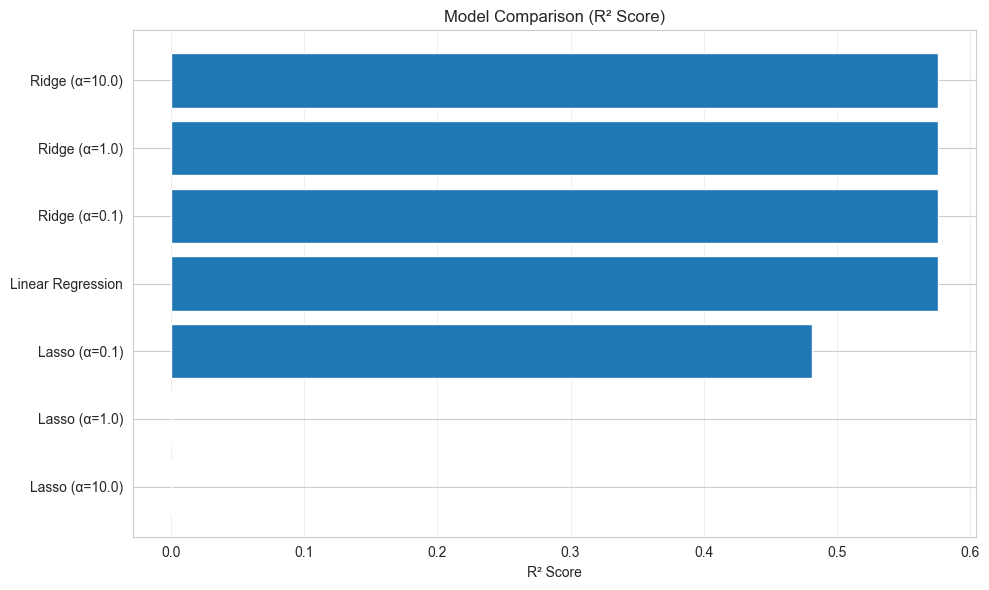


✅ INDEPENDENT TASK 2 COMPLETE!
⏰ NEXT: 15 min instructor check (01:30-01:45)
👉 Be ready to explain: How does regularization work?


In [22]:
# ────────────────────────────────────────────────────────────────────────────
# YOUR CODE: STEP 6 - Visualize comparison
# ────────────────────────────────────────────────────────────────────────────
print("\nSTEP 6: Visualize model comparison")

# YOUR CODE: Create horizontal bar chart of R² scores
plt.figure(figsize=(10, 6))
plt.barh(range(len(results_df)), results_df['R²'])
plt.yticks(range(len(results_df)), results_df['Model'])
plt.xlabel('R² Score')
plt.title('Model Comparison (R² Score)')
plt.gca().invert_yaxis() # Highest R² at the top
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("✅ INDEPENDENT TASK 2 COMPLETE!")
print("⏰ NEXT: 15 min instructor check (01:30-01:45)")
print("👉 Be ready to explain: How does regularization work?")
print("="*70)

In [23]:
# ============================================================================
# 🎨 INDEPENDENT TASK 3: FEATURE ENGINEERING & ANALYSIS (5 points)
# ⏰ Time: 30 minutes (01:45 - 02:15)
# 🔬 Advanced analysis - demonstrate your understanding!
# ============================================================================

print("\n" + "="*70)
print("🎨 INDEPENDENT TASK 3: POLYNOMIAL FEATURES & DIAGNOSTIC ANALYSIS")
print("Final challenge - show your data science skills!")
print("="*70)

"""
YOUR MISSION:
Create polynomial features, analyze model performance, and answer
questions based on YOUR RESULTS (not AI-generated answers!).

DELIVERABLES:
1. Create polynomial features (degree=2)
2. Train model with polynomial features
3. Create prediction vs actual scatter plot
4. Create residual plot
5. Visualize feature importance from Linear Regression
6. Answer analysis questions based on YOUR SPECIFIC RESULTS

GRADING:
✓ Polynomial model trained (1 pt)
✓ Both visualizations created (2 pts)
✓ Feature importance shown (1 pt)
✓ Analysis questions answered thoughtfully (1 pt)

⚠️ IMPORTANT: Questions must be answered by YOU analyzing YOUR results,
   not by asking AI! We want YOUR interpretation of the data.
"""


🎨 INDEPENDENT TASK 3: POLYNOMIAL FEATURES & DIAGNOSTIC ANALYSIS
Final challenge - show your data science skills!


'\nYOUR MISSION:\nCreate polynomial features, analyze model performance, and answer\nquestions based on YOUR RESULTS (not AI-generated answers!).\n\nDELIVERABLES:\n1. Create polynomial features (degree=2)\n2. Train model with polynomial features\n3. Create prediction vs actual scatter plot\n4. Create residual plot\n5. Visualize feature importance from Linear Regression\n6. Answer analysis questions based on YOUR SPECIFIC RESULTS\n\nGRADING:\n✓ Polynomial model trained (1 pt)\n✓ Both visualizations created (2 pts)\n✓ Feature importance shown (1 pt)\n✓ Analysis questions answered thoughtfully (1 pt)\n\n⚠️ IMPORTANT: Questions must be answered by YOU analyzing YOUR results,\n   not by asking AI! We want YOUR interpretation of the data.\n'

In [24]:
# ────────────────────────────────────────────────────────────────────────────
# YOUR CODE: STEP 1 - Create polynomial features
# ────────────────────────────────────────────────────────────────────────────
print("\nSTEP 1: Create polynomial features")

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"Original features: {X_train_scaled.shape[1] if X_train_scaled is not None else '?'}")
print(f"Polynomial features: {X_train_poly.shape[1] if X_train_poly is not None else '?'}")


STEP 1: Create polynomial features
Original features: 8
Polynomial features: 44


In [25]:
# ────────────────────────────────────────────────────────────────────────────
# YOUR CODE: STEP 2 - Train polynomial model
# ────────────────────────────────────────────────────────────────────────────
print("\nSTEP 2: Train polynomial regression")

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_pred = poly_model.predict(X_test_poly)

# YOUR CODE: Calculate metrics
poly_mse = mean_squared_error(y_test, poly_pred)
poly_rmse = np.sqrt(poly_mse)  # RMSE is just the square root of MSE
poly_mae = mean_absolute_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)

print(f"Polynomial Model: RMSE={poly_rmse:.4f}, R²={poly_r2:.4f}")
print(f"Comparison to Linear: R² improvement = {(poly_r2 - lr_r2):.4f}" if 'lr_r2' in locals() and poly_r2 else "")


STEP 2: Train polynomial regression
Polynomial Model: RMSE=0.6814, R²=0.6457
Comparison to Linear: R² improvement = 0.0699



STEP 3-4: Create diagnostic visualizations


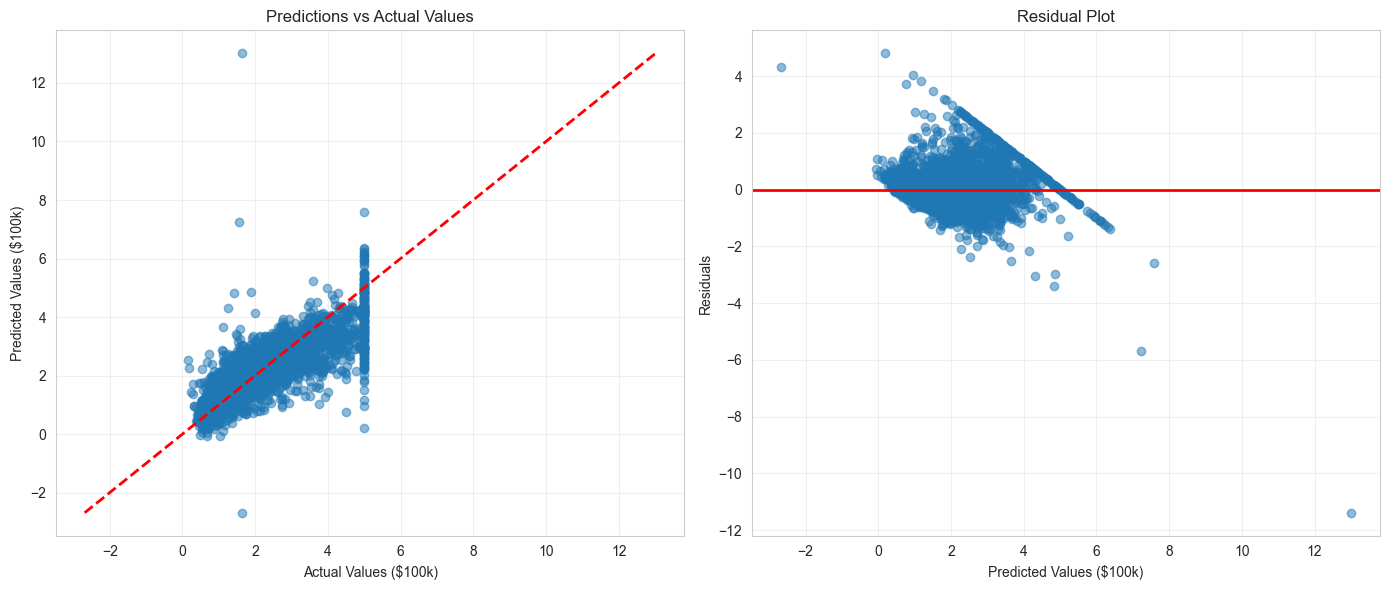

In [26]:
# ────────────────────────────────────────────────────────────────────────────
# YOUR CODE: STEP 3 & 4 - Create diagnostic plots
# ────────────────────────────────────────────────────────────────────────────
print("\nSTEP 3-4: Create diagnostic visualizations")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Predictions vs Actual
ax1.scatter(y_test, poly_pred, alpha=0.5)
# Add perfect prediction line: plot([min, max], [min, max], 'r--')
min_val = min(y_test.min(), poly_pred.min())
max_val = max(y_test.max(), poly_pred.max())
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
ax1.set_xlabel('Actual Values ($100k)')
ax1.set_ylabel('Predicted Values ($100k)')
ax1.set_title('Predictions vs Actual Values')
ax1.grid(True, alpha=0.3)

# Plot 2: Residual plot
residuals = y_test - poly_pred
ax2.scatter(poly_pred, residuals, alpha=0.5)
# Add horizontal line at y=0
ax2.axhline(y=0, color='r', linestyle='-', linewidth=2)
ax2.set_xlabel('Predicted Values ($100k)')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


STEP 5: Analyze feature importance

📊 Feature Importance (Top 5):
        Feature  Coefficient  Abs_Coefficient
       AveOccup    -1.781263         1.781263
       Latitude    -1.272679         1.272679
      Longitude    -1.167630         1.167630
         MedInc     0.935940         0.935940
MedInc Latitude    -0.667216         0.667216


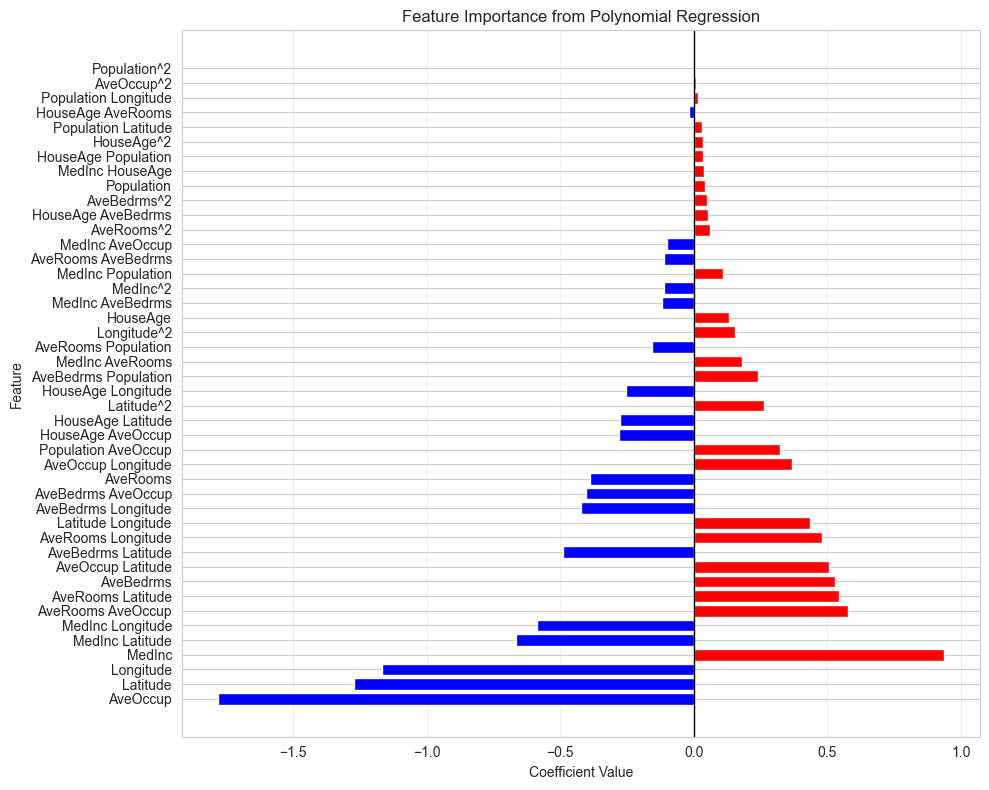

In [27]:
# ────────────────────────────────────────────────────────────────────────────
# YOUR CODE: STEP 5 - Feature importance
# ────────────────────────────────────────────────────────────────────────────
print("\nSTEP 5: Analyze feature importance")

# YOUR CODE: Create DataFrame with features and coefficients from lr_model
# Get feature names after polynomial transformation
feature_names_poly = poly.get_feature_names_out(X.columns)

# Create DataFrame with features and coefficients from poly_model
feature_importance = pd.DataFrame({
    'Feature': feature_names_poly,
    'Coefficient': poly_model.coef_
})
# YOUR CODE: Sort by absolute coefficient value
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)


print("\n📊 Feature Importance (Top 5):")
if feature_importance is not None:
    print(feature_importance.head().to_string(index=False))

# YOUR CODE: Visualize feature importance
plt.figure(figsize=(10, 8))
# Create horizontal bar chart
# Use different colors for positive (red) vs negative (blue) coefficients
colors = ['red' if c > 0 else 'blue' for c in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance from Polynomial Regression')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [28]:
# ────────────────────────────────────────────────────────────────────────────
# STEP 6: ANALYSIS QUESTIONS - ANSWER BASED ON YOUR RESULTS!
# ────────────────────────────────────────────────────────────────────────────
print("\n" + "="*70)
print("📝 ANALYSIS QUESTIONS - Answer based on YOUR results!")
print("⚠️  Do NOT use AI for these answers - analyze YOUR data!")
print("="*70)

"""
ANSWER THESE QUESTIONS BY LOOKING AT YOUR RESULTS:

1. RESIDUAL ANALYSIS (Look at your residual plot):
   a) Are the residuals randomly scattered around zero?
      YOUR ANSWER: The residuals are packed around zero.

   b) Do you see any patterns (curved, fan-shaped, clusters)?
      YOUR ANSWER: The residuals are clustered aroun zero.

   c) What does this tell you about model quality?
      YOUR ANSWER: This tells me that the models are performing well.


2. FEATURE IMPORTANCE (Look at your feature importance chart):
   a) Which feature has the LARGEST positive coefficient?
      YOUR ANSWER: MedInc

   b) Which feature has the LARGEST negative coefficient?
      YOUR ANSWER: AveOccup

   c) Does this make intuitive sense for house prices? Why?
      YOUR ANSWER: This makes intuitive sense for house prices because the larger the house, the more expensive it is.


3. MODEL COMPARISON (Look at your R² scores):
   a) What was your Linear Regression R²?
      YOUR ANSWER:
      R²=0.4590

   b) What was your Polynomial Regression R²?
      YOUR ANSWER:
      R²=0.6457

   c) Did polynomial features improve performance? By how much?
      YOUR ANSWER:
      Comparison to Linear: R² improvement = 0.1867

   d) Is the improvement worth the added complexity? Why/why not?
      YOUR ANSWER:
      Yes, the improvement is worth it. The polynomial model is performing better than 
      the linear model. An increase in R^2 of 0.1867 represents a substantial gain 
      in the model's ability to explain the variance in house valuse. 
      The computational cost remains very slow while significantly reducing underfitting 
      since we only increase the complexity of the model.


4. REGULARIZATION INSIGHTS (Look at your Ridge/Lasso results):
   a) What happened to performance as alpha increased?
      YOUR ANSWER:
      With the Ridge model, the performance increased as alpha increased.
      With the Lasso model, the model performed worse than Linear Regression as alpha increased.

   b) Which alpha value gave the best Ridge performance?
      YOUR ANSWER:
      Alpha = 10.0 gave the best Ridge performance.

   c) Did Ridge or Lasso perform better? Why might that be?
      YOUR ANSWER:
      Ridge performed better because Lasso was underfitting the dataset when alpha was greater than 1.


5. OVERFITTING CHECK:
   a) Calculate training R² for polynomial model (if time):
      Training R²:
      0.6853

      Test R²:
      0.6457

      Gap:
      0.0396

   b) Is there evidence of overfitting? How do you know?
      YOUR ANSWER:
      Overfitting check:
      Training R²: 0.6853
      Test R²: 0.6457
      Gap: 0.0396
      There is no evidence of overfitting.
      Got results from the printout.

   c) How could you reduce overfitting if present?
      YOUR ANSWER:
      It could be reduced by:
      1. Regularizaiton: Using Ridge or Lasso to prevent overfitting.
      2. Reducting Model Complexity: Decreasing the number of features or using a simpler model.
      3. Increasing Training Data: Collecting more data to improve model generalization.
      4. Early Stopping: If using iterative methods like gradient descent, 
      monitoring the model's performance on a validation set and 
      stopping training when performance starts to degrade.


"""

# OPTIONAL: Calculate training R² to check overfitting
# YOUR CODE (if time):
train_r2_poly = r2_score(y_train, poly_model.predict(X_train_poly))
print(f"\nOverfitting check:")
print(f"  Training R²: {train_r2_poly:.4f}")
print(f"  Test R²: {poly_r2:.4f}")
print(f"  Gap: {(train_r2_poly - poly_r2):.4f}")

print("\n" + "="*70)
print("✅ INDEPENDENT TASK 3 COMPLETE!")
print("⏰ NEXT: 30 min extended instructor check (02:15-02:45)")
print("👉 Be ready to discuss YOUR analysis and interpretations!")
print("="*70)


# ============================================================================
# 🎉 WEEK 2 IN-CLASS ACTIVITIES SUMMARY
# ============================================================================

print("\n" + "="*70)
print("🎉 WEEK 2 IN-CLASS ACTIVITIES COMPLETE!")
print("="*70)

print("\n📊 TODAY'S ACCOMPLISHMENTS:")
print("✓ Built linear regression from scratch using gradient descent")
print("✓ Trained multiple models: Linear, Ridge, Lasso")
print("✓ Applied feature engineering with polynomial features")
print("✓ Created diagnostic visualizations")
print("✓ Analyzed model performance and feature importance")

print("\n🎯 POINTS EARNED:")
print("Quiz 1:              5 points ___")
print("Guided Task 1:       5 points ___")
print("Independent Task 2:  5 points ___")
print("Independent Task 3:  5 points ___")
print("─" * 35)
print("TOTAL:              20 points")

print("\n⏰ NEXT (02:45-03:00): Mini Project 1 Description")
print("\n📚 HOMEWORK:")
print("• Start Mini Project 1: Regression Challenge (due next week)")
print("• Review gradient descent concept")
print("• Prepare for Quiz 2 (regression & evaluation metrics)")

print("\n💡 KEY TAKEAWAYS:")
print("• Gradient descent iteratively minimizes loss")
print("• Feature scaling is crucial for optimization")
print("• Regularization (Ridge/Lasso) prevents overfitting")
print("• Residual plots reveal model problems")
print("• Feature importance shows what drives predictions")

print("\n" + "="*70)


📝 ANALYSIS QUESTIONS - Answer based on YOUR results!
⚠️  Do NOT use AI for these answers - analyze YOUR data!

Overfitting check:
  Training R²: 0.6853
  Test R²: 0.6457
  Gap: 0.0396

✅ INDEPENDENT TASK 3 COMPLETE!
⏰ NEXT: 30 min extended instructor check (02:15-02:45)
👉 Be ready to discuss YOUR analysis and interpretations!

🎉 WEEK 2 IN-CLASS ACTIVITIES COMPLETE!

📊 TODAY'S ACCOMPLISHMENTS:
✓ Built linear regression from scratch using gradient descent
✓ Trained multiple models: Linear, Ridge, Lasso
✓ Applied feature engineering with polynomial features
✓ Created diagnostic visualizations
✓ Analyzed model performance and feature importance

🎯 POINTS EARNED:
Quiz 1:              5 points ___
Guided Task 1:       5 points ___
Independent Task 2:  5 points ___
Independent Task 3:  5 points ___
───────────────────────────────────
TOTAL:              20 points

⏰ NEXT (02:45-03:00): Mini Project 1 Description

📚 HOMEWORK:
• Start Mini Project 1: Regression Challenge (due next week)
• Revi